# chap 15 트레이딩을 위한 기술적 지표

1. 추세추종 전략: 주가가 동일한 방향으로 지속될 것이라는 데 베팅하며, 이동평균 등의 지표가 사용된다.
2. 평균회귀 전략: 주가가 평균으로 다시 회귀하는 데 베팅하며, RSI, 볼린저 밴드 등의 지표가 사용된다.

## 15.2 이동평균

이동평균: 정해진 기간 내 주식의 평균 가격 - 기간이 길수록 장기간의 추세, 짧을수록 단기간의 추세

골든크로스(golden cross): 단기 이동평균선이 중장기 이동평균선을 아래에서 위로 뚫고 올라가는 현상 - 강세 신호
데드크로스(dead cross): 단기 이동평균선이 중장기 이동평균선을 위에서 아래로 뚫고 내려가는 현상 - 약세 신호

단순 이동평균(Simple Moving Average. SMA): 단순히 주어진 기간의 종가의 평균 - 가장 일반적인 계산 방법
지수 이동평균(Exponential Moving Average. EMA): 최근 데이터가 더 중요할 수 있으며, 이를 반영하여 각 데이터에 가중치를 다르게 부여한 후 평균을 구함

In [1]:
# pandas-ta 패키지로 지표 계산하기
# 단순 이동평균

import yfinance as yf

stock_data = yf.download('^GSPC')   # S&P 500 지수 데이터를 다운
stock_data = stock_data.tail(500)

[*********************100%***********************]  1 of 1 completed


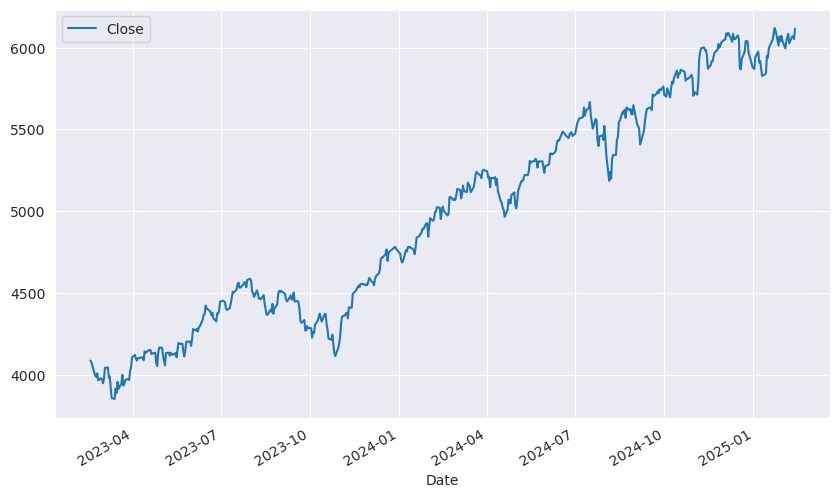

In [2]:
import pandas_ta as ta
import matplotlib.pyplot as plt

# 단순 이동평균 구하기
stock_data['SMA_20'] = ta.sma(stock_data['Close'], length=20)   # 20일 단순 이동평균
stock_data['SMA_60'] = ta.sma(stock_data['Close'], length=60)   # 60일 단순 이동평균

stock_data.columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'SMA_60']

# is_nan_SMA_20 = stock_data['SMA_20'].isna().all()
# is_nan_SMA_60 = stock_data['SMA_60'].isna().all()
# print(is_nan_SMA_60)

stock_data[['Close', 'SMA_20', 'SMA_60']].plot(figsize=(10, 6))
plt.show()  # 종가, 20일 이동평균, 60일 이동평균에 해당하는 값을 그래프로 나타냄

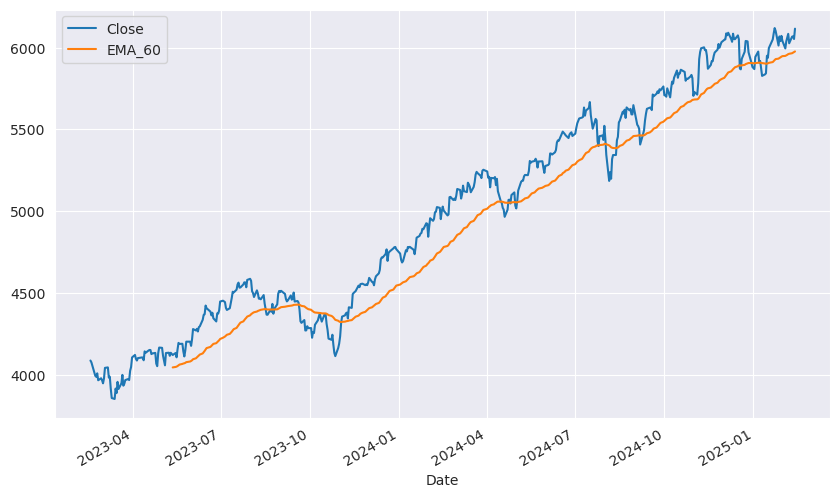

In [3]:
# 지수 이동평균 구하기

stock_data['EMA_60'] = ta.ema(stock_data['Close'], length=60)   # 60일 지수 이동평균
stock_data[['Close', 'SMA_60', 'EMA_60']].plot(figsize=(10, 6))
plt.show()  # 지수 이동평균이 최근 데이터에 더 많은 가중치 부여 -> 단순 이동평균보다 주가의 움직임에 따라 더욱 민감하게 반응하는 것을 알 수 있음

# 15.3 상대강도지수

상대강도지수(Relative Strength Index. RSI): 일정 기간 주가의 상승폭과 하락폭의 크기를 비교해 상승과 하락의 상대적인 강도를 나타낸 지표

상대 강도를 구하는 과정은 아래와 같다.
1. U(Up): 가격이 상승한 날의 상승폭 구하기
2. D(Down): 가격이 하락한 날의 하락폭 구하기
3. AU(Average Up)와 AD(Average Down): U값과 D값의 평균을 각각 구함
4. RS(Relative Strength): AU/AD를 통해 상대강도 구함

- RS가 크다 = 일정 기간동안 상승한 폭이 하락한 폭보다 크다.
- RSI의 범위는 0 ~ 100
- 일반적으로 RSI >= 70일 경우 과매수 구간으로서 매도할 때로 여겨지고 RSI <= 30일 경우 과매도 구간으로서 매수해야 할 때로 여겨짐

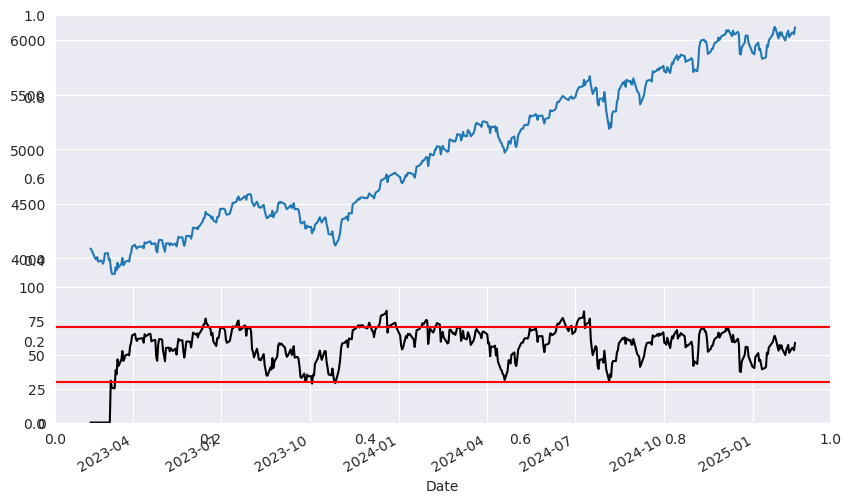

In [4]:
# S&P 500 지수의 RSI 계산

from matplotlib import gridspec

stock_data['RSI_14'] = ta.rsi(stock_data['Close'], length=14)   # 14일 간 RSI 계산
stock_data.loc[:, 'RSI_14'] = stock_data['RSI_14'].fillna(0)    # NaN을 0으로 채워줌
fig = plt.subplots(figsize=(10, 6), sharex=True)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])  # 그림을 두 구간으로 나눔

# 주가 나타내기
ax1 = plt.subplot(gs[0])    # 상단에는 주가 그리기
ax1 = stock_data['Close'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])

# RSI 나타내기
ax2 = plt.subplot(gs[1])    # 하단에는 RSI 및 과매수, 과매도를 의미하는 70과 30 부분에 수평선을 그림
ax2 = stock_data['RSI_14'].plot(color='black', ylim=[0, 100])
ax2.axhline(y=70, color='r', linestyle='-')
ax2.axhline(y=30, color='r', linestyle='-')
ax2.set_xlabel
plt.subplots_adjust(wspace=0, hspace=0)     # 두 그림 간 빈칸을 0으로 설정

plt.show()

## 15.4 볼린저 밴드

볼린저 밴드(Bolinger band)는 이동평균선을 중심으로 일정 표준편차를 상한선과 하한선으로 설정한 밴드 (주가의 움직임이 **정규분포**를 따른다는 가정에 기초함)
- 중심 밴드: n기간의 이동평균
- 상단 밴드: 중심 밴드 기준 k 표준편차 위
- 하단 밴드: 중심 밴드 기준 k 표준편차 아래

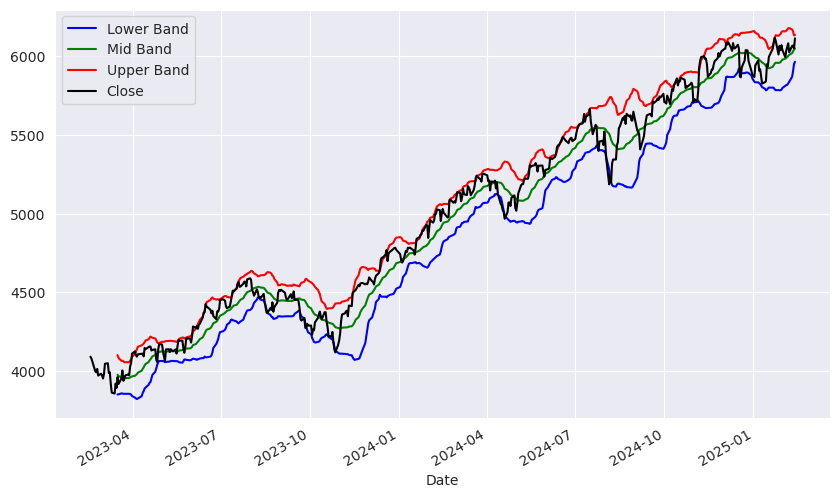

In [6]:
import pandas as pd

band = ta.bbands(stock_data['Close'], length=20, std=2)     # length: 이동평균에 계산되는 최근 일수, # std: 상단과 하단 밴드를 몇 표준편차 기준으로 계산할지 의미

bb = pd.concat([band[['BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0']], stock_data['Close']], axis = 1)   # 볼린저 밴드 값과 종가를 concat() 함수를 이용해 하나의 데이터프레임으로 합침
bb.columns = ['Lower Band', 'Mid Band', 'Upper Band', 'Close']
bb.plot(figsize=(10, 6),
        color={
            'Upper Band': 'red',
            'Lower Band': 'blue',
            'Mid Band': 'green',
            'Close': 'black'
        })
plt.show()      # 주가가 크게 움직이지 않는 한, 2 표준편차로 계산된 밴드 안에서 주가가 움직이는 것 확인 가능